<a href="https://colab.research.google.com/github/Bala-452/LGMVIP-Web/blob/main/CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(set(y_train_full))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


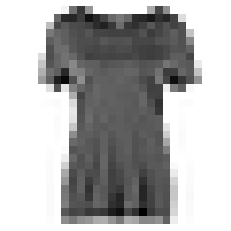

In [ ]:
plt.imshow(X_train[10], cmap="binary")
plt.axis('off')
plt.show()

In [ ]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
set(y_train_full)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(64, (3, 3),  activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 10, activation = 'softmax'))

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history=classifier.fit(X_train,y_train,epochs = 3,validation_data = (X_valid,y_valid))

Epoch 1/3
1719/1719 [==============================] - 59s 34ms/step - loss: 0.1898 - accuracy: 0.9299 - val_loss: 0.2495 - val_accuracy: 0.9100
Epoch 2/3
1719/1719 [==============================] - 57s 33ms/step - loss: 0.1678 - accuracy: 0.9372 - val_loss: 0.2419 - val_accuracy: 0.9134
Epoch 3/3
1719/1719 [==============================] - 57s 33ms/step - loss: 0.1479 - accuracy: 0.9446 - val_loss: 0.2416 - val_accuracy: 0.9162


In [ ]:
y_pred_prob=classifier.predict(X_test)
y_pred_prob[:10]

313/313 [==============================] - 5s 16ms/step


array([[2.48365666e-07, 1.07467288e-08, 1.26196980e-07, 4.16600976e-08,
        8.04342264e-08, 1.24090759e-03, 1.68407198e-07, 4.21185105e-04,
        1.00928887e-07, 9.98337090e-01],
       [7.11141593e-06, 1.17903867e-10, 9.99882877e-01, 6.97328275e-08,
        9.54777497e-05, 1.30967936e-11, 1.43377256e-05, 1.32762204e-11,
        3.23754463e-08, 4.25247615e-11],
       [1.74342918e-09, 9.99999940e-01, 1.41280335e-10, 3.00129394e-10,
        8.95458707e-10, 1.73441166e-12, 2.19456364e-09, 1.07826786e-14,
        2.45662986e-11, 1.05850300e-12],
       [4.78111373e-09, 9.99999940e-01, 1.05756426e-09, 6.47616760e-09,
        4.87625007e-09, 4.88534734e-12, 1.60092366e-08, 1.13268065e-13,
        4.19452494e-12, 6.08592256e-12],
       [2.10224003e-01, 3.31217024e-07, 3.29169608e-03, 1.00872922e-03,
        1.64404102e-02, 1.95970861e-05, 7.69014418e-01, 5.34256976e-08,
        1.81126254e-07, 5.95897916e-07],
       [1.84368503e-08, 9.99999702e-01, 2.75682446e-08, 1.76566370e-08,
   

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [ ]:
import numpy as np
y_pred=[]
for i in y_pred_prob:
  y_pred.append(np.argmax(i))
y_pred[:10]

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7]

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[884,   2,  21,   9,   2,   0, 144,   0,   7,   0],
       [  2, 983,   1,  12,   1,   0,   2,   0,   1,   0],
       [  8,   0, 750,   4,  11,   0,  30,   0,   3,   0],
       [ 31,  11,  11, 913,  20,   0,  37,   0,   3,   0],
       [  5,   2, 129,  37, 931,   0, 116,   0,   3,   0],
       [  3,   0,   0,   0,   0, 980,   0,   9,   4,   5],
       [ 64,   1,  88,  23,  35,   0, 667,   0,   8,   1],
       [  0,   0,   0,   0,   0,  15,   0, 984,   4,  52],
       [  3,   1,   0,   2,   0,   0,   4,   0, 966,   0],
       [  0,   0,   0,   0,   0,   5,   0,   7,   1, 942]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9

In [ ]:
classifier.evaluate(X_test,y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.2777 - accuracy: 0.9000


[0.277660071849823, 0.8999999761581421]